In [1]:
from dataset import MeatDataset, HappinessDataset
import logging
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("default")


/Users/aryan/Desktop/aicm-happiness/.aicm-venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# logging configuration
logging.basicConfig(
    level=logging.INFO,
    format="%(name)s:%(lineno)s [%(levelname)s]: %(message)s",
)

In [3]:
MEAT_DATA = MeatDataset.from_kaggle()

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.kaggle.com:443
DEBUG:urllib3.connectionpool:https://www.kaggle.com:443 "GET /api/v1/datasets/view/ulrikthygepedersen/meat-consumption HTTP/11" 200 None


DEBUG:dataset:Downloaded dataset to: /Users/aryan/.cache/kagglehub/datasets/ulrikthygepedersen/meat-consumption/versions/1
DEBUG:dataset:Found CSV files: ['meat_consumption.csv']
INFO:dataset:Loaded data for years: ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [4]:
HAPPINESS = HappinessDataset.from_kaggle()

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.kaggle.com:443
DEBUG:urllib3.connectionpool:https://www.kaggle.com:443 "GET /api/v1/datasets/view/sazidthe1/global-happiness-scores-and-factors HTTP/11" 200 None


DEBUG:dataset:Downloaded dataset to: /Users/aryan/.cache/kagglehub/datasets/sazidthe1/global-happiness-scores-and-factors/versions/1
DEBUG:dataset:Found CSV files: ['WHR_2015.csv', 'WHR_2016.csv', 'WHR_2017.csv', 'WHR_2019.csv', 'WHR_2018.csv', 'WHR_2020.csv', 'WHR_2021.csv', 'WHR_2023.csv', 'WHR_2022.csv']
INFO:dataset:Loaded data for years: ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [5]:
CHECK_MARK = "\u2705"
CROSS_MARK = "\u274C"

for twenty_xy_str in MEAT_DATA.get_years():
    twenty_xy = int(twenty_xy_str)
    xy = twenty_xy - 2000

    assert (
        MEAT_DATA[twenty_xy] is MEAT_DATA[xy]
    ), f"{CROSS_MARK} failed at year {twenty_xy}"

    print(f"{CHECK_MARK} {twenty_xy=} and {xy=} have the same df. :)")

✅ twenty_xy=2015 and xy=15 have the same df. :)
✅ twenty_xy=2016 and xy=16 have the same df. :)
✅ twenty_xy=2017 and xy=17 have the same df. :)
✅ twenty_xy=2018 and xy=18 have the same df. :)
✅ twenty_xy=2019 and xy=19 have the same df. :)
✅ twenty_xy=2020 and xy=20 have the same df. :)
✅ twenty_xy=2021 and xy=21 have the same df. :)
✅ twenty_xy=2022 and xy=22 have the same df. :)
✅ twenty_xy=2023 and xy=23 have the same df. :)


In [6]:
MEAT_DATA[2015].describe()

,time,value
count,312.0,3.120000e+02
mean,2015.0,2.673291e+03
std,0.0,1.205075e+04
min,2015.0,7.825515e-07
25%,2015.0,6.307388e+00
50%,2015.0,2.761483e+01
75%,2015.0,6.004051e+02
max,2015.0,1.195972e+05


In [7]:
MEAT_DATA[2015].head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,2015,20.633580
1,AUS,MEATCONSUMP,PIG,KG_CAP,A,2015,22.022767
2,AUS,MEATCONSUMP,POULTRY,KG_CAP,A,2015,42.269450
3,AUS,MEATCONSUMP,SHEEP,KG_CAP,A,2015,9.397973
4,CAN,MEATCONSUMP,BEEF,KG_CAP,A,2015,17.670715


In [8]:
MEAT_DATA[2015]["frequency"].unique()

array(['A'], dtype=object)

In [9]:
for year in MEAT_DATA.get_years():
    MEAT_DATA[year].drop(columns=["frequency", "indicator"], inplace=True)

In [10]:
MEAT_DATA[2015].head()

,location,subject,measure,time,value
0,AUS,BEEF,KG_CAP,2015,20.633580
1,AUS,PIG,KG_CAP,2015,22.022767
2,AUS,POULTRY,KG_CAP,2015,42.269450
3,AUS,SHEEP,KG_CAP,2015,9.397973
4,CAN,BEEF,KG_CAP,2015,17.670715


In [11]:
for year in MEAT_DATA.get_years():
    print(f"{year} -> {len(MEAT_DATA[year]["location"].unique())}")

2015 -> 39
2016 -> 39
2017 -> 39
2018 -> 39
2019 -> 39
2020 -> 39
2021 -> 39
2022 -> 39
2023 -> 39


In [12]:
MEAT_DATA[2023][MEAT_DATA[2023]["location"] == "WLD"]

,location,subject,measure,time,value
128,WLD,BEEF,KG_CAP,2023,6.466370
129,WLD,PIG,KG_CAP,2023,12.149333
130,WLD,POULTRY,KG_CAP,2023,14.455059
131,WLD,SHEEP,KG_CAP,2023,1.758285
238,WLD,PIG,THND_TONNE,2023,124408.073766
242,WLD,BEEF,THND_TONNE,2023,73782.476140
249,WLD,SHEEP,THND_TONNE,2023,15958.696583
272,WLD,POULTRY,THND_TONNE,2023,131197.190698


In [13]:
def filter_df(df, **predicates):
    mask = pd.Series([True] * len(df))
    for key, value in predicates.items():
        mask &= (df[key] == value)
    return df[mask]

In [14]:
# Load the world map
WORLD = gpd.read_file(
    "../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
)
NON_CNTRY_LOCS = ['WLD', 'EU27', 'OECD', 'BRICS', "NOR"]

In [15]:
MEAT_DATA[2023]["location"].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'ARG',
       'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN',
       'ISR', 'KAZ', 'MYS', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS',
       'SAU', 'ZAF', 'THA', 'UKR', 'VNM', 'WLD', 'EU27', 'OECD', 'BRICS',
       'NOR', 'CHE', 'GBR'], dtype=object)

In [16]:
WORLD_CNTRIES = WORLD["ISO_A3"].unique()
for cntry in MEAT_DATA[2023]["location"].unique():
    if cntry not in WORLD_CNTRIES and cntry not in NON_CNTRY_LOCS:
        print(f"{cntry} not in world iso_a3")

In [17]:
WORLD["ISO_A3"].unique()

array(['FJI', 'TZA', 'ESH', 'CAN', 'USA', 'KAZ', 'UZB', 'PNG', 'IDN',
       'ARG', 'CHL', 'COD', 'SOM', 'KEN', 'SDN', 'TCD', 'HTI', 'DOM',
       'RUS', 'BHS', 'FLK', '-99', 'GRL', 'ATF', 'TLS', 'ZAF', 'LSO',
       'MEX', 'URY', 'BRA', 'BOL', 'PER', 'COL', 'PAN', 'CRI', 'NIC',
       'HND', 'SLV', 'GTM', 'BLZ', 'VEN', 'GUY', 'SUR', 'ECU', 'PRI',
       'JAM', 'CUB', 'ZWE', 'BWA', 'NAM', 'SEN', 'MLI', 'MRT', 'BEN',
       'NER', 'NGA', 'CMR', 'TGO', 'GHA', 'CIV', 'GIN', 'GNB', 'LBR',
       'SLE', 'BFA', 'CAF', 'COG', 'GAB', 'GNQ', 'ZMB', 'MWI', 'MOZ',
       'SWZ', 'AGO', 'BDI', 'ISR', 'LBN', 'MDG', 'PSE', 'GMB', 'TUN',
       'DZA', 'JOR', 'ARE', 'QAT', 'KWT', 'IRQ', 'OMN', 'VUT', 'KHM',
       'THA', 'LAO', 'MMR', 'VNM', 'PRK', 'KOR', 'MNG', 'IND', 'BGD',
       'BTN', 'NPL', 'PAK', 'AFG', 'TJK', 'KGZ', 'TKM', 'IRN', 'SYR',
       'ARM', 'SWE', 'BLR', 'UKR', 'POL', 'AUT', 'HUN', 'MDA', 'ROU',
       'LTU', 'LVA', 'EST', 'DEU', 'BGR', 'GRC', 'TUR', 'ALB', 'HRV',
       'CHE', 'LUX',

In [18]:
MEAT_DATA[2023].groupby("location")['value'].sum()
meat_sum_df = MEAT_DATA[2023].groupby("location")['value'].sum().reset_index()
meat_sum_df.columns = ['location', 'value']
meat_sum_df

,location,value
0,ARG,5485.671168
1,AUS,3093.632397
2,BRA,21337.513441
3,BRICS,134492.980598
4,CAN,3318.561789
5,CHE,627.280093
6,CHL,1921.928266
7,CHN,91132.917751
8,COL,3400.960828
9,EGY,3044.710812


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/aryan/Desktop/aicm-happiness/.aicm-venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/aryan/Desktop/aicm-happiness/.aicm-venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/aryan/Desktop/aicm-happiness/.aicm-venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='no

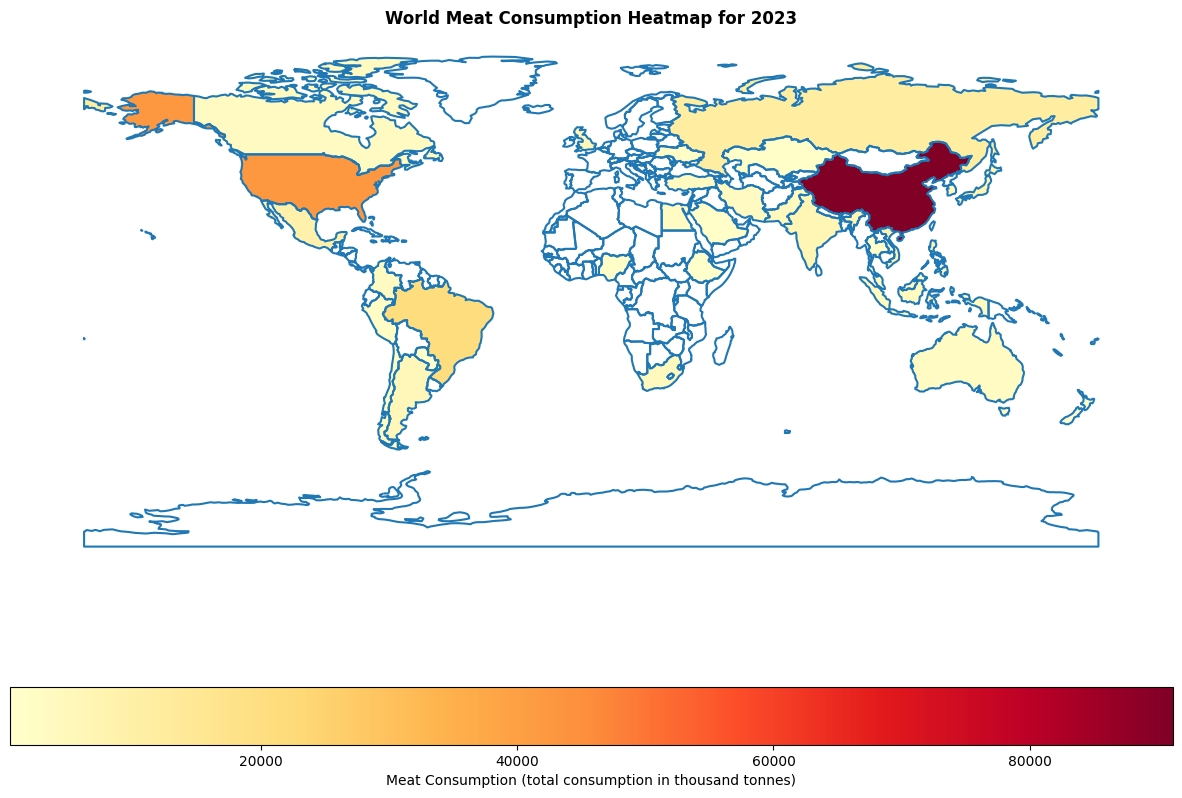

In [19]:
def plot_meat_consumption_heatmap(year, per_cap=False):
    # Merge the meat data with the world map
    meat_data_year = MEAT_DATA[year].copy()
    rows_to_remove = "THND_TONNE" if per_cap else "KG_CAP"
    if per_cap:
        meat_data_year = meat_data_year[meat_data_year["measure"] != rows_to_remove]
    meat_data_year = meat_data_year[~meat_data_year["location"].isin(NON_CNTRY_LOCS)]

    meat_data_year = meat_data_year.groupby('location')['value'].sum().reset_index()
    meat_data_year.columns = ['location', 'value']

    world_df = WORLD.merge(
        meat_data_year,
        how="left",
        left_on="ISO_A3",
        right_on="location",
    )
    cmap = "YlOrRd"  # Use a different color map

    # Plot the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world_df.boundary.plot(ax=ax)
    meat_measure = "kg per capita" if per_cap else "total consumption in thousand tonnes"
    vmin = world_df["value"].min()
    vmax = world_df["value"].max()
    world_df.plot(
        column="value",
        ax=ax,
        legend=True,
        legend_kwds={
            "label": f"Meat Consumption ({meat_measure})",
            "orientation": "horizontal",
        },
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.title(f"World Meat Consumption Heatmap for {year}", fontweight='bold')
    plt.show()

plot_meat_consumption_heatmap(2023)

In [20]:
MEAT_TOTAL = filter_df(MEAT_DATA[2023], measure="THND_TONNE")
MEAT_TOTAL = MEAT_TOTAL[~MEAT_TOTAL["location"].isin(NON_CNTRY_LOCS)]

In [93]:
MEAT_TOTAL_CAP = filter_df(MEAT_DATA[2023], measure="KG_CAP")
MEAT_TOTAL_CAP = MEAT_TOTAL_CAP[~MEAT_TOTAL_CAP["location"].isin(NON_CNTRY_LOCS)]

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x12901cbf0>


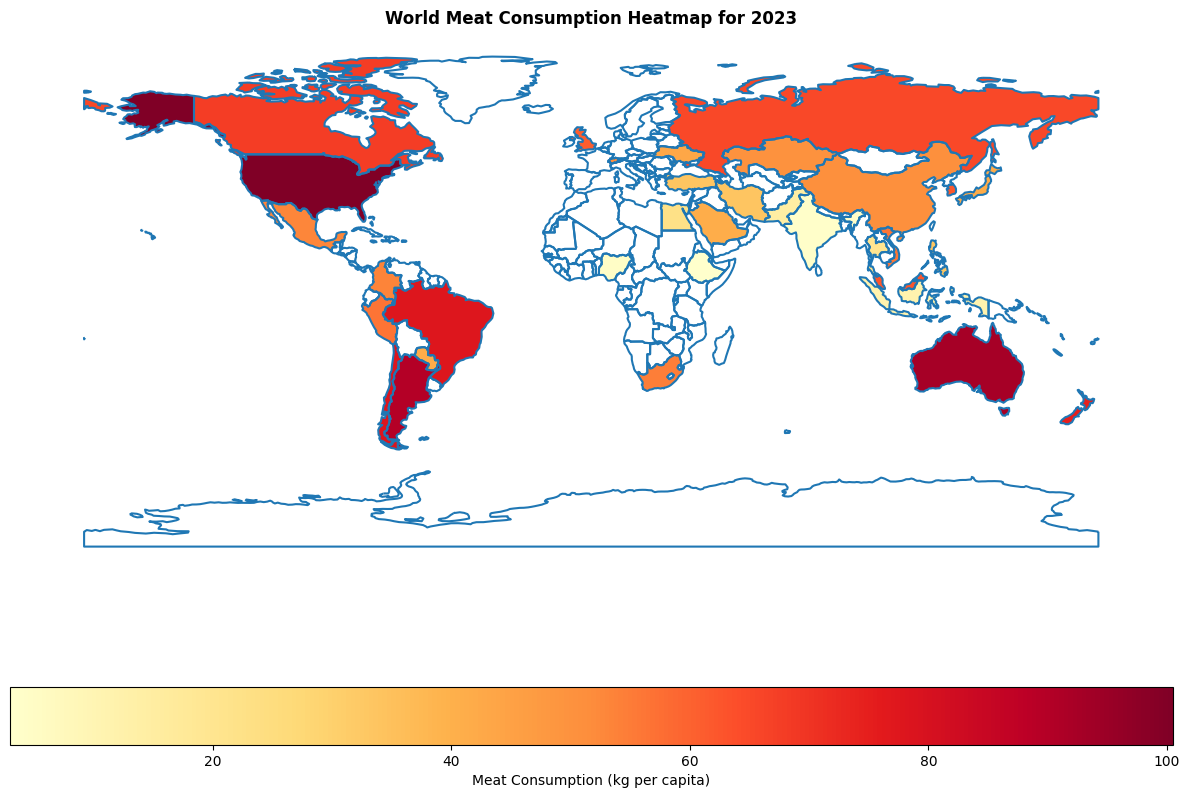

In [21]:
plot_meat_consumption_heatmap(2023, per_cap=True)

In [22]:
filter_df(MEAT_DATA[2023], location="RUS", measure="KG_CAP")

,location,subject,measure,time,value
104,RUS,BEEF,KG_CAP,2023,10.637214
105,RUS,PIG,KG_CAP,2023,21.444163
106,RUS,POULTRY,KG_CAP,2023,31.756264
107,RUS,SHEEP,KG_CAP,2023,1.475150


In [23]:
MEAT_DATA[2023][(MEAT_DATA[2023]["location"] == "RUS") & (MEAT_DATA[2023]["measure"] == "KG_CAP")]

,location,subject,measure,time,value
104,RUS,BEEF,KG_CAP,2023,10.637214
105,RUS,PIG,KG_CAP,2023,21.444163
106,RUS,POULTRY,KG_CAP,2023,31.756264
107,RUS,SHEEP,KG_CAP,2023,1.475150


In [24]:
MEAT_DATA[2023][MEAT_DATA[2023]["location"] == ""]

,location,subject,measure,time,value


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x128efe3c0>


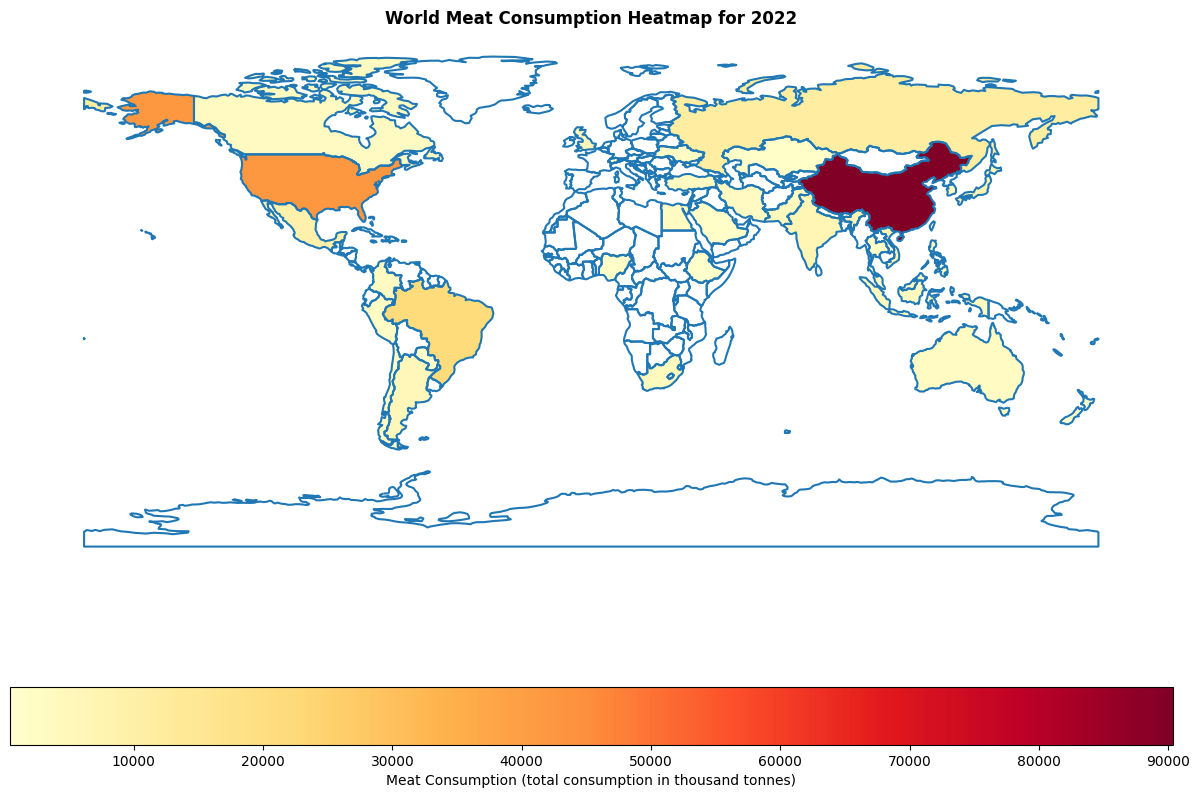

In [25]:
plot_meat_consumption_heatmap(2022)

In [109]:
MEAT_DATA[2023].head()

,location,subject,measure,time,value
0,AUS,BEEF,KG_CAP,2023,18.487402
1,AUS,PIG,KG_CAP,2023,22.607280
2,AUS,POULTRY,KG_CAP,2023,44.511370
3,AUS,SHEEP,KG_CAP,2023,7.200391
4,CAN,BEEF,KG_CAP,2023,16.921263


    location  subject     measure  time         value
28       USA     BEEF      KG_CAP  2023     27.070753
29       USA      PIG      KG_CAP  2023     23.375780
30       USA  POULTRY      KG_CAP  2023     49.581532
31       USA    SHEEP      KG_CAP  2023      0.427256
171      USA     BEEF  THND_TONNE  2023  13091.559752
   subject         value
0     BEEF  13118.630504
1      PIG  10168.575441
2  POULTRY  19122.904748
3    SHEEP    164.786646


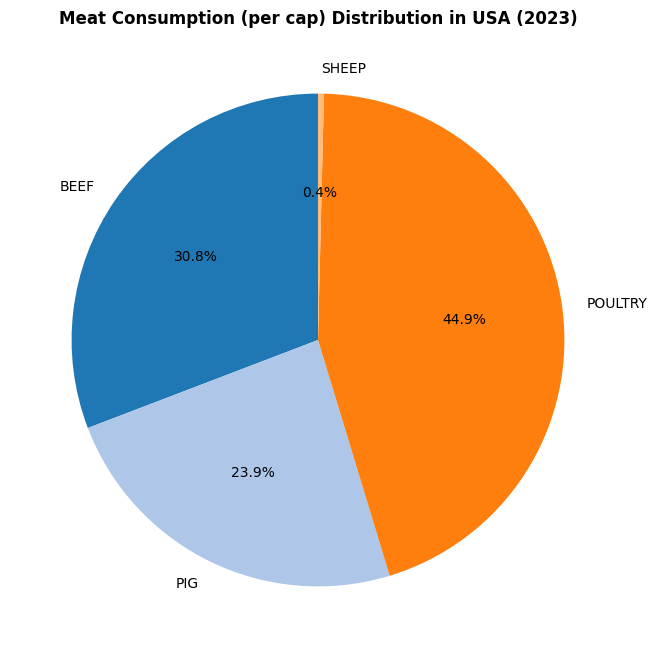

In [ ]:
import seaborn as sns


def plot_meat_distribution(country):
    # Filter the data for the specified country
    filter_df(MEAT_DATA[2023], measure="KG_CAP")
    country_data = filter_df(MEAT_DATA[2023], location=country)
    print(country_data.head())

    # Group by meat type and sum the values
    meat_distribution = country_data.groupby('subject')['value'].sum().reset_index()
    print(meat_distribution)

    # Plot the pie chart using seaborn
    plt.figure(figsize=(10, 8))
    sns.set_palette('tab20')
    plt.pie(
        meat_distribution['value'],
        labels=meat_distribution['subject'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('tab20')
    )
    plt.ylabel('')
    plt.title(f'Meat Consumption (per cap) Distribution in {country} (2023)', fontweight='bold')
    plt.legend().set_visible(False)
    plt.show()


plot_meat_distribution('USA')

In [110]:
NON_CNTRY_LOCS

['WLD', 'EU27', 'OECD', 'BRICS', 'NOR']

    location  subject     measure  time          value
128      WLD     BEEF      KG_CAP  2023       6.466370
129      WLD      PIG      KG_CAP  2023      12.149333
130      WLD  POULTRY      KG_CAP  2023      14.455059
131      WLD    SHEEP      KG_CAP  2023       1.758285
238      WLD      PIG  THND_TONNE  2023  124408.073766
   subject          value
0     BEEF   73788.942509
1      PIG  124420.223098
2  POULTRY  131211.645757
3    SHEEP   15960.454868


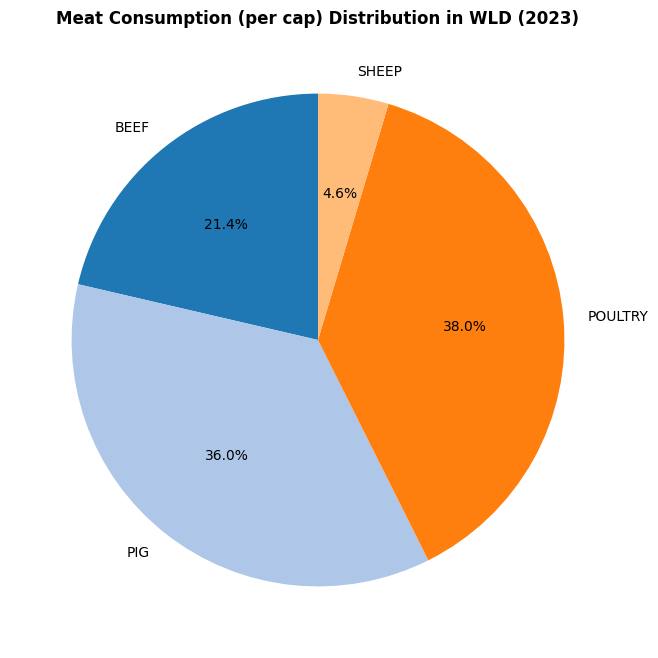

In [111]:
plot_meat_distribution("WLD")

    location  subject     measure  time        value
104      RUS     BEEF      KG_CAP  2023    10.637214
105      RUS      PIG      KG_CAP  2023    21.444163
106      RUS  POULTRY      KG_CAP  2023    31.756264
107      RUS    SHEEP      KG_CAP  2023     1.475150
155      RUS  POULTRY  THND_TONNE  2023  5167.738154
   subject        value
0     BEEF  2186.761212
1      PIG  3958.469880
2  POULTRY  5199.494419
3    SHEEP   241.528282


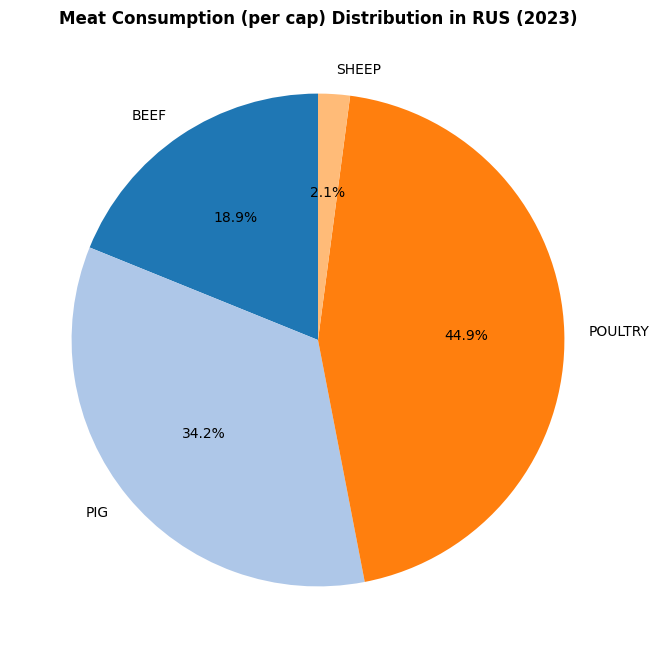

In [85]:
plot_meat_distribution("RUS")

    location  subject     measure  time        value
16       MEX     BEEF      KG_CAP  2023     8.730322
17       MEX      PIG      KG_CAP  2023    14.088137
18       MEX  POULTRY      KG_CAP  2023    29.569801
19       MEX    SHEEP      KG_CAP  2023     0.519210
245      MEX  POULTRY  THND_TONNE  2023  4647.934710
   subject        value
0     BEEF  1733.878924
1      PIG  2512.438090
2  POULTRY  4677.504510
3    SHEEP    82.131360


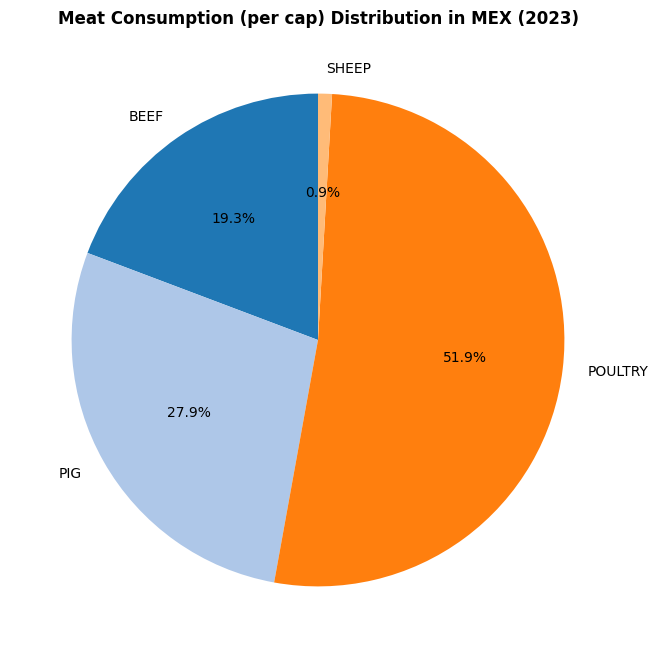

In [112]:
plot_meat_distribution("MEX")

    location  subject     measure  time         value
44       CHN     BEEF      KG_CAP  2023      3.922685
45       CHN      PIG      KG_CAP  2023     31.054756
46       CHN  POULTRY      KG_CAP  2023     12.557741
47       CHN    SHEEP      KG_CAP  2023      3.342546
234      CHN      PIG  THND_TONNE  2023  57119.893166
   subject         value
0     BEEF   8043.612849
1      PIG  57150.947922
2  POULTRY  20485.615758
3    SHEEP   5452.741222


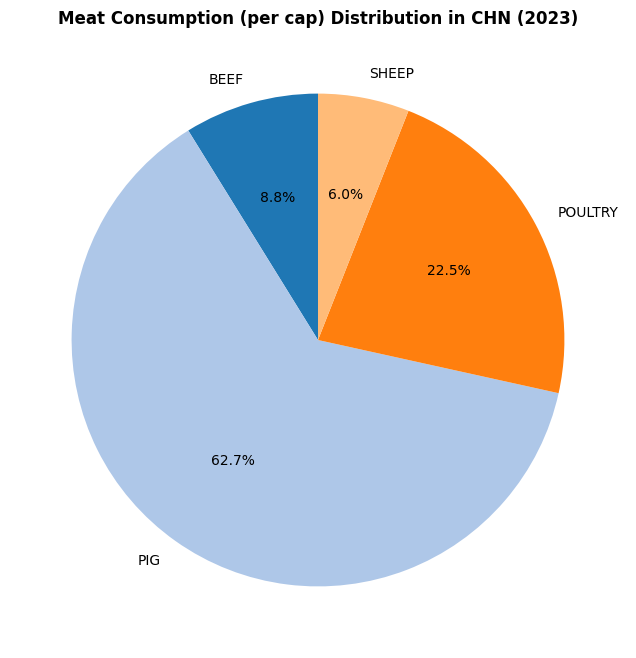

In [86]:
plot_meat_distribution('CHN')

    location  subject     measure  time       value
36       BRA     BEEF      KG_CAP  2023   24.573200
37       BRA      PIG      KG_CAP  2023   12.801988
38       BRA  POULTRY      KG_CAP  2023   39.963079
39       BRA    SHEEP      KG_CAP  2023    0.545046
193      BRA    SHEEP  THND_TONNE  2023  134.983874
   subject        value
0     BEEF  7675.165459
1      PIG  3589.762891
2  POULTRY  9937.056170
3    SHEEP   135.528920


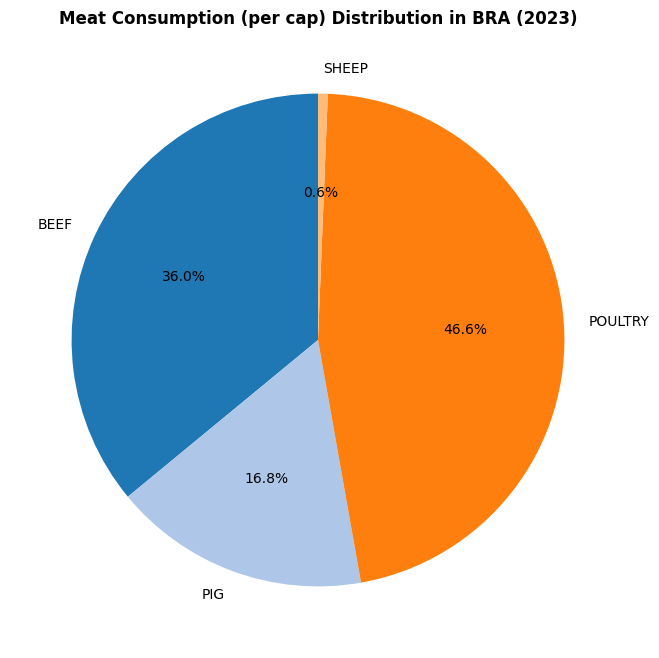

In [113]:
plot_meat_distribution("BRA")

    location  subject     measure  time       value
60       IND     BEEF      KG_CAP  2023    0.542251
61       IND      PIG      KG_CAP  2023    0.164643
62       IND  POULTRY      KG_CAP  2023    2.721216
63       IND    SHEEP      KG_CAP  2023    0.463387
147      IND    SHEEP  THND_TONNE  2023  750.454308
   subject        value
0     BEEF  1104.532273
1      PIG   300.988342
2  POULTRY  4409.725275
3    SHEEP   750.917695


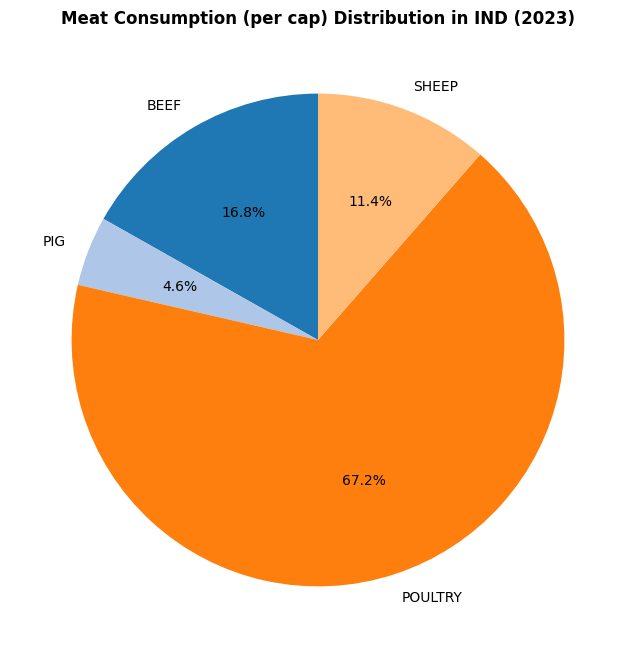

In [87]:
plot_meat_distribution('IND')

    location  subject     measure  time       value
0        AUS     BEEF      KG_CAP  2023   18.487402
1        AUS      PIG      KG_CAP  2023   22.607280
2        AUS  POULTRY      KG_CAP  2023   44.511370
3        AUS    SHEEP      KG_CAP  2023    7.200391
233      AUS      PIG  THND_TONNE  2023  761.885261
   subject        value
0     BEEF   712.733894
1      PIG   784.492542
2  POULTRY  1374.120984
3    SHEEP   222.284978


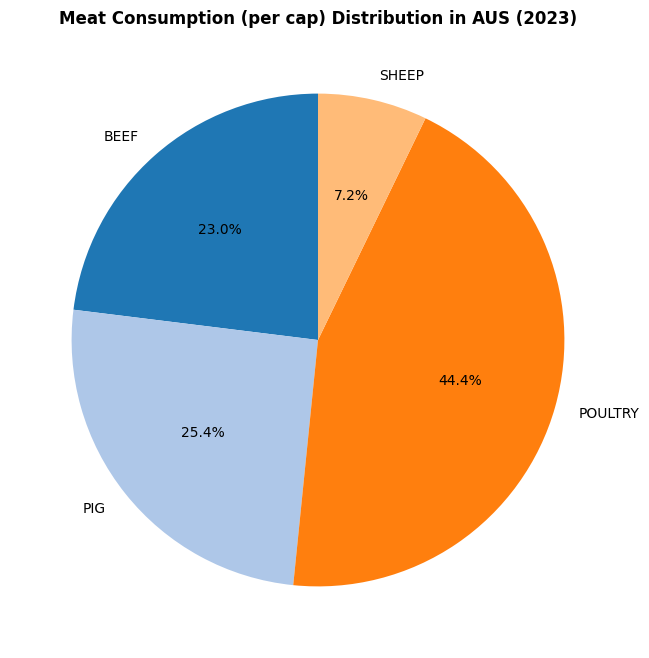

In [88]:
plot_meat_distribution("AUS")

    location  subject     measure  time        value
4        CAN     BEEF      KG_CAP  2023    16.921263
5        CAN      PIG      KG_CAP  2023    15.690051
6        CAN  POULTRY      KG_CAP  2023    34.314318
7        CAN    SHEEP      KG_CAP  2023     0.922041
230      CAN  POULTRY  THND_TONNE  2023  1502.680821
   subject        value
0     BEEF   948.966228
1      PIG   791.279476
2  POULTRY  1536.995139
3    SHEEP    41.320946


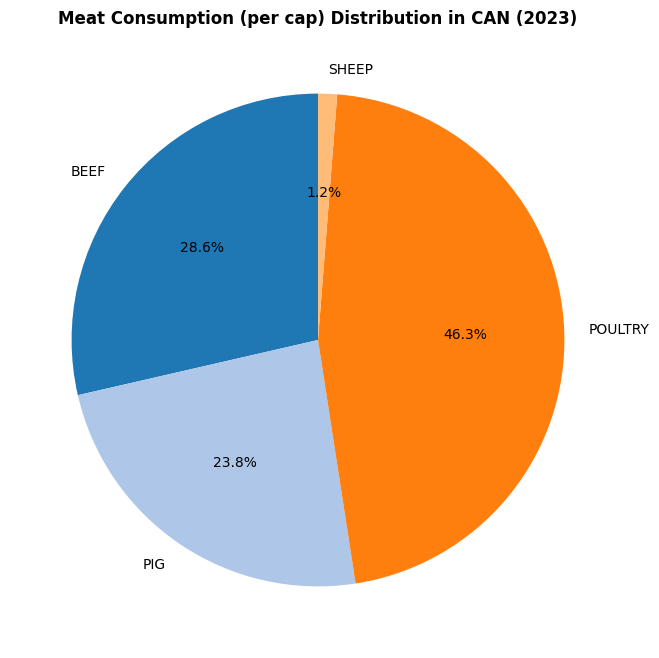

In [89]:
plot_meat_distribution("CAN")

    location  subject     measure  time        value
88       PAK     BEEF      KG_CAP  2023     6.590732
89       PAK      PIG      KG_CAP  2023     0.000004
90       PAK  POULTRY      KG_CAP  2023     6.146574
91       PAK    SHEEP      KG_CAP  2023     2.013114
226      PAK  POULTRY  THND_TONNE  2023  1533.216114
   subject        value
0     BEEF  2073.343780
1      PIG     0.001004
2  POULTRY  1539.362688
3    SHEEP   504.169113


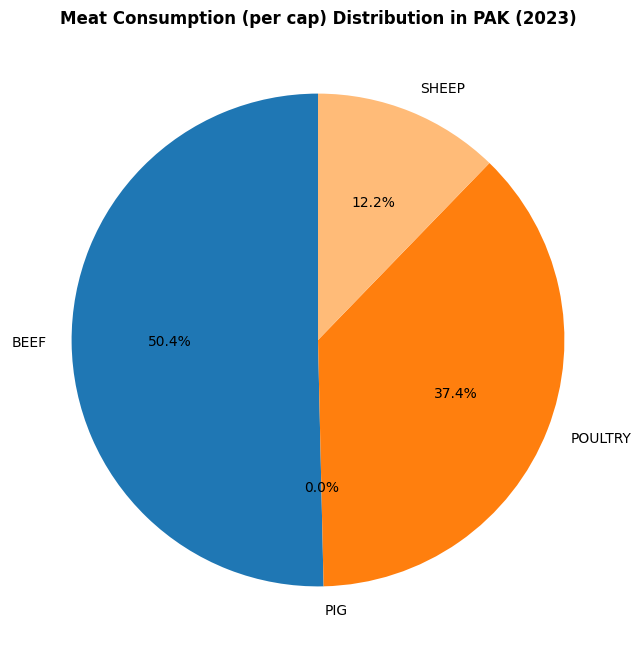

In [90]:
plot_meat_distribution("PAK")

In [ ]:
plot_meat_distribution("GBR")

In [33]:
top_5 = MEAT_TOTAL.nlargest(10, 'value')
bottom_5 = MEAT_TOTAL.nsmallest(10, 'value')
top_5, bottom_5

(    location  subject     measure  time         value
 234      CHN      PIG  THND_TONNE  2023  57119.893166
 268      CHN  POULTRY  THND_TONNE  2023  20473.058017
 203      USA  POULTRY  THND_TONNE  2023  19073.323216
 171      USA     BEEF  THND_TONNE  2023  13091.559752
 198      USA      PIG  THND_TONNE  2023  10145.199661
 208      BRA  POULTRY  THND_TONNE  2023   9897.093091
 279      CHN     BEEF  THND_TONNE  2023   8039.690164
 212      BRA     BEEF  THND_TONNE  2023   7650.592259
 284      CHN    SHEEP  THND_TONNE  2023   5449.398676
 155      RUS  POULTRY  THND_TONNE  2023   5167.738154,
     location subject     measure  time      value
 207      TUR     PIG  THND_TONNE  2023   0.000188
 265      PAK     PIG  THND_TONNE  2023   0.001000
 184      EGY     PIG  THND_TONNE  2023   1.001010
 244      IRN     PIG  THND_TONNE  2023   1.800100
 160      ETH     PIG  THND_TONNE  2023   2.291693
 158      THA   SHEEP  THND_TONNE  2023   3.929005
 276      PRY   SHEEP  THND_TONNE  20

In [34]:
MEAT_TOTAL

,location,subject,measure,time,value
144,KOR,SHEEP,THND_TONNE,2023,18.749100
145,ZAF,SHEEP,THND_TONNE,2023,180.244023
146,KOR,PIG,THND_TONNE,2023,2074.887458
147,IND,SHEEP,THND_TONNE,2023,750.454308
149,ETH,SHEEP,THND_TONNE,2023,49.299337
...,...,...,...,...,...
291,MYS,SHEEP,THND_TONNE,2023,47.518400
300,GBR,BEEF,THND_TONNE,2023,1149.101551
301,GBR,PIG,THND_TONNE,2023,1457.285770
302,GBR,POULTRY,THND_TONNE,2023,2204.844527


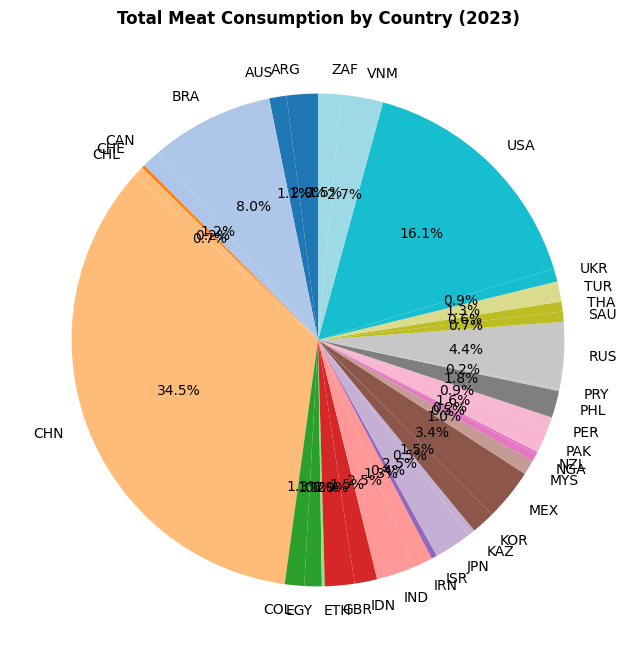

In [35]:
# Group by country and sum the values
MEAT_TOTAL_BY_CNTRY = MEAT_TOTAL.groupby('location')['value'].sum()

# Plot the pie chart
plt.figure(figsize=(10, 8))
MEAT_TOTAL_BY_CNTRY.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.ylabel('')
plt.title('Total Meat Consumption by Country (2023)', fontweight='bold')
plt.show()

In [36]:
MEAT_TOTAL_BY_CNTRY = MEAT_TOTAL_BY_CNTRY.reset_index()
MEAT_TOTAL_BY_CNTRY.columns = ['location', 'value']

In [64]:
MEAT_TOTAL_BY_CNTRY_CAP = filter_df(MEAT_DATA[2023], measure="KG_CAP").groupby('location')['value'].sum().reset_index()
MEAT_TOTAL_BY_CNTRY_CAP.columns = ['location', 'value']
MEAT_TOTAL_BY_CNTRY_CAP

,location,value
0,ARG,90.128007
1,AUS,92.806444
2,BRA,77.883312
3,BRICS,32.966396
4,CAN,67.847674
5,CHE,51.091157
6,CHL,78.373437
7,CHN,50.877728
8,COL,53.476055
9,EGY,22.425439


In [37]:
MEAT_TOTAL[MEAT_TOTAL["location"] == "IND"]

,location,subject,measure,time,value
147,IND,SHEEP,THND_TONNE,2023,750.454308
150,IND,POULTRY,THND_TONNE,2023,4407.004060
241,IND,BEEF,THND_TONNE,2023,1103.990023
283,IND,PIG,THND_TONNE,2023,300.823699


In [38]:
HAPPINESS[2023].head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [39]:
iso_to_country = WORLD.set_index('ISO_A3')['ADMIN'].to_dict()

In [40]:
MEAT_TOTAL['country'] = MEAT_TOTAL['location'].map(iso_to_country)
MEAT_TOTAL.head()

,location,subject,measure,time,value,country
144,KOR,SHEEP,THND_TONNE,2023,18.749100,South Korea
145,ZAF,SHEEP,THND_TONNE,2023,180.244023,South Africa
146,KOR,PIG,THND_TONNE,2023,2074.887458,South Korea
147,IND,SHEEP,THND_TONNE,2023,750.454308,India
149,ETH,SHEEP,THND_TONNE,2023,49.299337,Ethiopia


In [41]:
MEAT_TOTAL_BY_CNTRY.head()
MEAT_TOTAL_BY_CNTRY['country'] = MEAT_TOTAL_BY_CNTRY['location'].map(iso_to_country)

In [42]:
HAPPINESS[2023].head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [43]:
def plot_correl_happy_meat():
    #  Merge meat consumption data with happiness data

    merged_data = pd.merge(
        MEAT_TOTAL_BY_CNTRY,
        HAPPINESS[2023],
        how="inner",
        left_on="country",
        right_on="country"
    )
    print(merged_data.head())


    # Calculate the correlation
    correlation = merged_data["value"].corr(merged_data["happiness_score"])

    # Plot the correlation
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data["value"], merged_data["happiness_score"], alpha=0.7)
    plt.title(f"Correlation between Meat Consumption and Happiness (2023)\nCorrelation: {correlation:.2f}", fontweight='bold')
    plt.xlabel("Total Meat Consumption (Thousand Tonnes)")
    plt.ylabel("Happiness Score")
    plt.grid(True)
    plt.show()

  location         value      country                       region  \
0      ARG   5395.543161    Argentina  Latin America and Caribbean   
1      AUS   3000.825953    Australia        North America and ANZ   
2      BRA  21259.630128       Brazil  Latin America and Caribbean   
3      CAN   3250.714115       Canada        North America and ANZ   
4      CHE    576.188936  Switzerland               Western Europe   

   happiness_score  gdp_per_capita  social_support  healthy_life_expectancy  \
0            6.024           1.590           1.388                    0.427   
1            7.095           1.899           1.497                    0.532   
2            6.125           1.454           1.250                    0.387   
3            6.961           1.881           1.484                    0.541   
4            7.240           2.022           1.463                    0.582   

   freedom_to_make_life_choices  generosity  perceptions_of_corruption  
0                         0.587

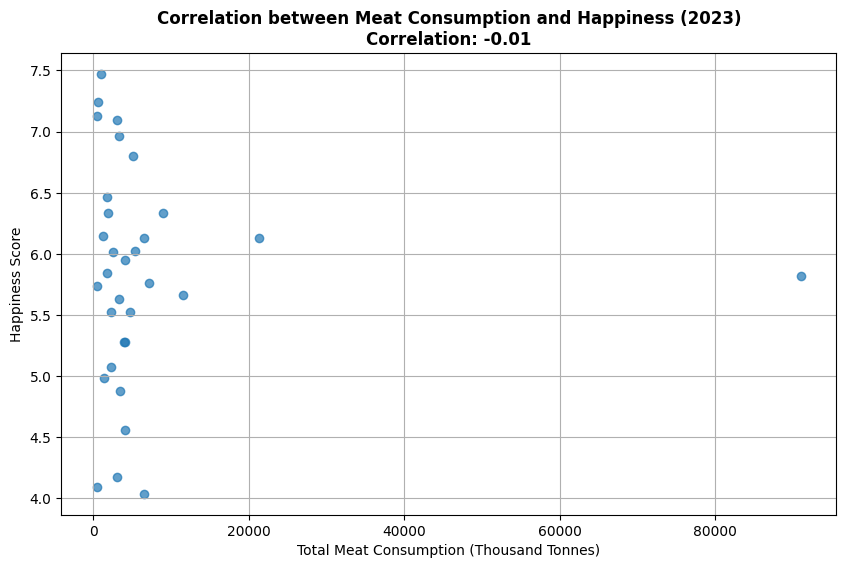

In [44]:
plot_correl_happy_meat()

In [45]:
MEAT_TOTAL.head()

,location,subject,measure,time,value,country
144,KOR,SHEEP,THND_TONNE,2023,18.749100,South Korea
145,ZAF,SHEEP,THND_TONNE,2023,180.244023,South Africa
146,KOR,PIG,THND_TONNE,2023,2074.887458,South Korea
147,IND,SHEEP,THND_TONNE,2023,750.454308,India
149,ETH,SHEEP,THND_TONNE,2023,49.299337,Ethiopia


In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

def clustering():
    # Create a dataframe with the required columns
    meat_values = MEAT_TOTAL_CAP.pivot_table(index='location', columns='subject', values='value', aggfunc='sum').reset_index()
    meat_values.columns = ['country', 'beef_value', 'pig_value', 'poultry_value', 'sheep_value']

    # Fill NaN values with 0
    meat_values = meat_values.fillna(0)
    print(meat_values.head())

    # Standardize the data
    scaler = MinMaxScaler()
    scaled_meat_values = scaler.fit_transform(meat_values[['beef_value', 'pig_value', 'poultry_value', 'sheep_value']])
    print(scaled_meat_values[:10])

    # Use the elbow method to find the best number of clusters
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_meat_values)
        sse.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters', fontweight='bold')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.grid(True)
    plt.show()

    # Fit KMeans with the optimal number of clusters (e.g., 4)
    optimal_k = 5
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    meat_values['cluster'] = kmeans.fit_predict(scaled_meat_values)

    # Display the clustered dataframe
    print(meat_values)
    return meat_values


  country  beef_value  pig_value  poultry_value  sheep_value
0     ARG   38.978664  11.778422      38.403747     0.967173
1     AUS   18.487402  22.607280      44.511370     7.200391
2     BRA   24.573200  12.801988      39.963079     0.545046
3     CAN   16.921263  15.690051      34.314318     0.922041
4     CHE   13.078711  22.343485      14.538213     1.130748
[[1.00000000e+00 3.77363795e-01 5.72842965e-01 1.06272049e-01]
 [4.66878922e-01 7.24304994e-01 6.64207370e-01 8.28243509e-01]
 [6.25213100e-01 4.10157391e-01 5.96169126e-01 5.73785358e-02]
 [4.26132705e-01 5.02686827e-01 5.11668880e-01 1.01044502e-01]
 [3.26161047e-01 7.15853368e-01 2.15836580e-01 1.25218275e-01]
 [4.95640054e-01 6.53115203e-01 5.66524368e-01 4.21914922e-02]
 [8.79487595e-02 9.94950073e-01 1.86210548e-01 3.81402996e-01]
 [2.77258534e-01 2.82357338e-01 4.96807774e-01 1.08188985e-02]
 [2.05752208e-01 2.31317641e-04 1.90554006e-01 1.23914653e-01]
 [5.14002869e-02 4.74261575e-04 0.00000000e+00 3.58652521e-02]]


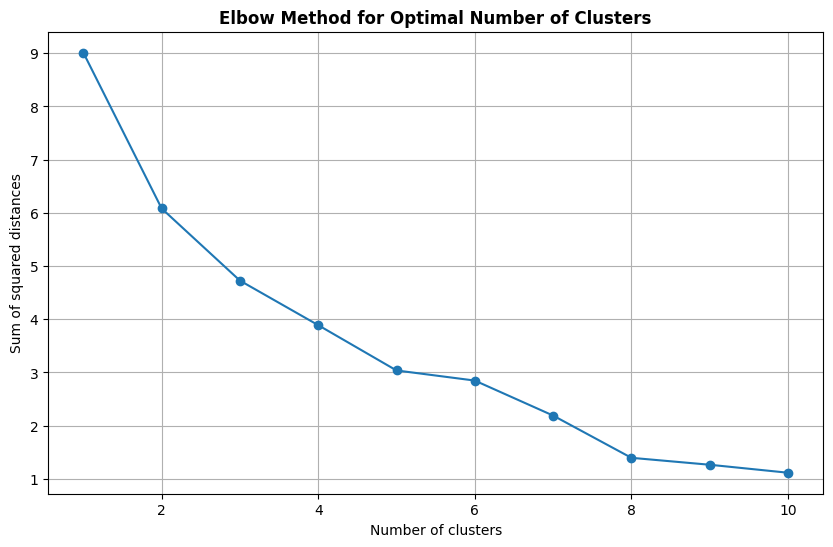

   country  beef_value  pig_value  poultry_value  sheep_value  cluster
0      ARG   38.978664  11.778422      38.403747     0.967173        2
1      AUS   18.487402  22.607280      44.511370     7.200391        3
2      BRA   24.573200  12.801988      39.963079     0.545046        2
3      CAN   16.921263  15.690051      34.314318     0.922041        2
4      CHE   13.078711  22.343485      14.538213     1.130748        1
5      CHL   19.592877  20.385278      37.981355     0.413927        2
6      CHN    3.922685  31.054756      12.557741     3.342546        3
7      COL   11.199074   8.813045      33.320868     0.143068        4
8      EGY    8.450627   0.007222      12.848097     1.119493        0
9      ETH    2.517893   0.014805       0.109744     0.359309        0
10     GBR   11.758874  16.616847      28.364161     4.134406        3
11     IDN    2.071428   1.020181       8.087936     0.439680        0
12     IND    0.542251   0.164643       2.721216     0.463387        0
13    

In [69]:
vals_with_clusters = clustering()

In [48]:
# Create a country to ISO_A3 map
country_to_iso_a3 = WORLD.set_index('ADMIN')['ISO_A3'].to_dict()

# Add a new iso_a3 column to vals_with_clusters
vals_with_clusters['iso_a3'] = vals_with_clusters['country'].map(country_to_iso_a3)
vals_with_clusters.head()

,country,beef_value,pig_value,poultry_value,sheep_value,cluster,iso_a3
0,ARG,2600.824618,705.301260,2038.083433,51.333850,4,NaN
1,AUS,694.246492,761.885261,1329.609614,215.084586,2,NaN
2,BRA,7650.592259,3576.960904,9897.093091,134.983874,0,NaN
3,CAN,932.044964,775.589425,1502.680821,40.398905,2,NaN
4,CHE,165.278889,253.400100,146.143270,11.366677,2,NaN


In [49]:
vals_with_clusters[vals_with_clusters['country'] == 'USA']

,country,beef_value,pig_value,poultry_value,sheep_value,cluster,iso_a3
31,USA,13091.559752,10145.199661,19073.323216,164.35939,1,NaN


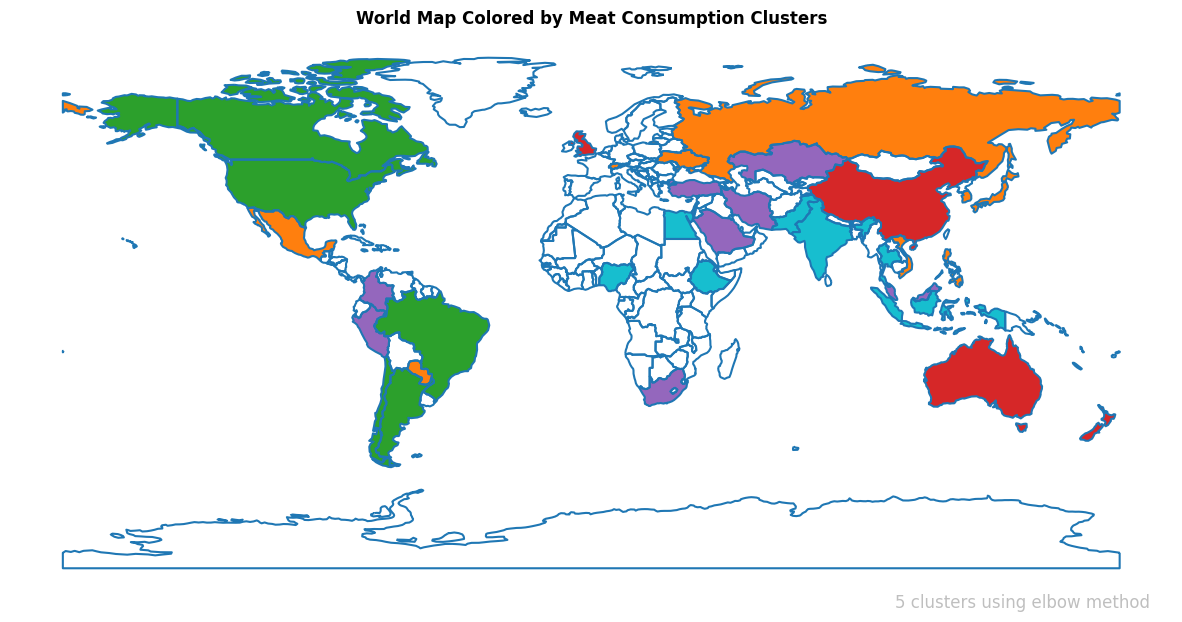

In [83]:
def plot_clustered_world_map():
    """
    """
    # Merge the clustered data with the world map
    world_df = WORLD.merge(
        vals_with_clusters,
        how="left",
        left_on="ISO_A3",
        right_on="country"
    )

    # Plot the world map with clusters
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world_df.boundary.plot(ax=ax)
    # Define cluster colors using descriptive variable names
    CLUSTER_0_COLOR = "#17becf"  # cyan
    CLUSTER_1_COLOR = "#ff7f0e"  # orange
    CLUSTER_2_COLOR = "#2ca02c"  # green
    CLUSTER_3_COLOR = "#d62728"  # red
    CLUSTER_4_COLOR = "#9467bd"  # purple

    # Map cluster numbers to colors
    cluster_colors = {
        0: CLUSTER_0_COLOR,
        1: CLUSTER_1_COLOR,
        2: CLUSTER_2_COLOR,
        3: CLUSTER_3_COLOR,
        4: CLUSTER_4_COLOR
    }
    world_df["color"] = world_df["cluster"].map(cluster_colors)
    plt.figtext(0.8, 0.2, "5 clusters using elbow method", ha="center", fontsize=12, color="gray", alpha=0.5)

    # Fill NaN values with a default color
    world_df["color"] = world_df["color"].fillna("white")

    world_df.plot(
        color=world_df["color"],
        ax=ax,
        legend=True,
        legend_kwds={
            "label": "Cluster",
            "orientation": "horizontal",
        }
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.title("World Map Colored by Meat Consumption Clusters", fontweight='bold')
    plt.show()

plot_clustered_world_map()

In [51]:
from dataset import AlcoholDataset

ALCOHOL = AlcoholDataset.from_kaggle()

DEBUG:dataset:Downloaded dataset to: /Users/aryan/.cache/kagglehub/datasets/thedevastator/oecd-alcohol-consumption-per-capita/versions/2
DEBUG:dataset:Found CSV files: ['OECD Alcohol Consumption per Capita.csv']
INFO:dataset:Loaded data for years: ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [52]:
ALCOHOL[2022].head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,CAN,ALCOHOL,TOT,LT_CAP15,A,2022,8.1,NaN
1,IRL,ALCOHOL,TOT,LT_CAP15,A,2022,10.2,NaN
2,NZL,ALCOHOL,TOT,LT_CAP15,A,2022,8.7,NaN
3,NOR,ALCOHOL,TOT,LT_CAP15,A,2022,6.6,NaN
4,CRI,ALCOHOL,TOT,LT_CAP15,A,2022,3.5,P


In [53]:
"""
Lukas:
? Should I become a vegan?

? Questions:
    - What's KG_CAP?
Ideas:
    - world heatmap for meat consumption value
    - pie charts for countries with drastic distribution
        - perhaps, look at the top meat consuming countries for each meat type

    - correlation with happiness with countries:
        - trends per country?

"""

"\nLukas:\n? Should I become a vegan?\n\n? Questions:\n    - What's KG_CAP?\nIdeas:\n    - world heatmap for meat consumption value\n    - pie charts for countries with drastic distribution\n        - perhaps, look at the top meat consuming countries for each meat type\n\n    - correlation with happiness with countries:\n        - trends per country?\n\n"

## Happiness by preferred meat


In [54]:
MEAT_TOTAL.head()

,location,subject,measure,time,value,country
144,KOR,SHEEP,THND_TONNE,2023,18.749100,South Korea
145,ZAF,SHEEP,THND_TONNE,2023,180.244023,South Africa
146,KOR,PIG,THND_TONNE,2023,2074.887458,South Korea
147,IND,SHEEP,THND_TONNE,2023,750.454308,India
149,ETH,SHEEP,THND_TONNE,2023,49.299337,Ethiopia


In [55]:
HAPPINESS[2023].head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


32                    Argentina
28     United States of America
36                       Brazil
76                   Kazakhstan
72                       Israel
40                        Chile
0                     Australia
4                        Canada
92                     Paraguay
112                South Africa
Name: location, dtype: object 125                     Vietnam
13                  South Korea
45                        China
29     United States of America
1                     Australia
297                 Switzerland
93                     Paraguay
105                      Russia
41                        Chile
21                  New Zealand
Name: location, dtype: object 74                       Israel
82                     Malaysia
30     United States of America
98                         Peru
2                     Australia
38                       Brazil
22                  New Zealand
34                    Argentina
42                        Chile
114         

/var/folders/09/jbwl3lnj1dd31_xbbj52_q8r0000gn/T/ipykernel_43730/3253750162.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


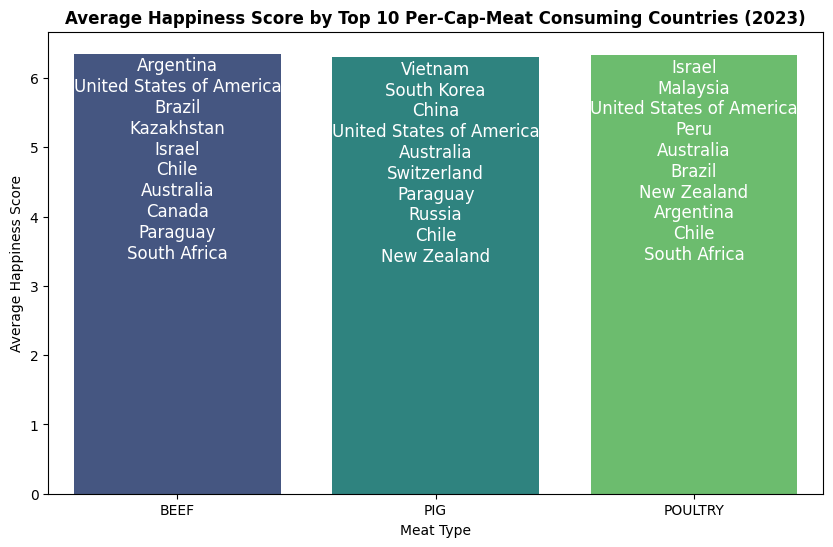

In [98]:
def plot_happiness_by_meat_type():
    # find top 10 countries for each meat type
    top_10_beef = (
        MEAT_TOTAL_CAP[MEAT_TOTAL_CAP["subject"] == "BEEF"]
        .nlargest(10, "value")["location"]
        .map(iso_to_country)
    )
    top_10_pig = (
        MEAT_TOTAL_CAP[MEAT_TOTAL_CAP["subject"] == "PIG"]
        .nlargest(10, "value")["location"]
        .map(iso_to_country)
    )
    top_10_poultry = (
        MEAT_TOTAL_CAP[MEAT_TOTAL_CAP["subject"] == "POULTRY"]
        .nlargest(10, "value")["location"]
        .map(iso_to_country)
    )

    print(top_10_beef, top_10_pig, top_10_poultry)

    # create a bar plot for each meat type to average happiness_score
    meat_types = ["BEEF", "PIG", "POULTRY"]
    top_10_countries = [top_10_beef, top_10_pig, top_10_poultry]
    avg_happiness_scores = []

    for meat_type, countries in zip(meat_types, top_10_countries):
        happiness_scores = HAPPINESS[2023][
            HAPPINESS[2023]["country"].isin(countries)
        ]["happiness_score"]
        avg_happiness_scores.append(happiness_scores.mean())

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=meat_types, y=avg_happiness_scores, palette="viridis"
    )
    for i, (meat_type, countries) in enumerate(
        zip(meat_types, top_10_countries)
    ):
        country_text = "\n".join(countries)
        ax.annotate(
            country_text,
            (i, avg_happiness_scores[i]),
            ha="center",
            va="bottom",
            fontsize=12,
            xytext=(0, -150),
            textcoords="offset points",
            color="white"
        )

    plt.title(
        "Average Happiness Score by Top 10 Per-Cap-Meat Consuming Countries (2023)",
        fontweight="bold",
    )
    plt.xlabel("Meat Type")
    plt.ylabel("Average Happiness Score")
    plt.show()


plot_happiness_by_meat_type()

# 4. Heatmap: Meat Consumption vs Happiness
X-axis: Meat types (BEEF, POULTRY, etc.).
Y-axis: Regions or countries.


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x12e1b43e0>


subject   location       BEEF        PIG    POULTRY     SHEEP
0        Argentina  38.978664  11.778422  38.403747  0.967173
1        Australia  18.487402  22.607280  44.511370  7.200391
2           Brazil  24.573200  12.801988  39.963079  0.545046
3           Canada  16.921263  15.690051  34.314318  0.922041
4            Chile  19.592877  20.385278  37.981355  0.413927
    location       BEEF        PIG    POULTRY     SHEEP    country  \
0  Argentina  38.978664  11.778422  38.403747  0.967173  Argentina   
1  Australia  18.487402  22.607280  44.511370  7.200391  Australia   
2     Brazil  24.573200  12.801988  39.963079  0.545046     Brazil   
3     Canada  16.921263  15.690051  34.314318  0.922041     Canada   
4      Chile  19.592877  20.385278  37.981355  0.413927      Chile   

                        region  happiness_score  gdp_per_capita  \
0  Latin America and Caribbean            6.024           1.590   
1        North America and ANZ            7.095           1.899   
2  Lat

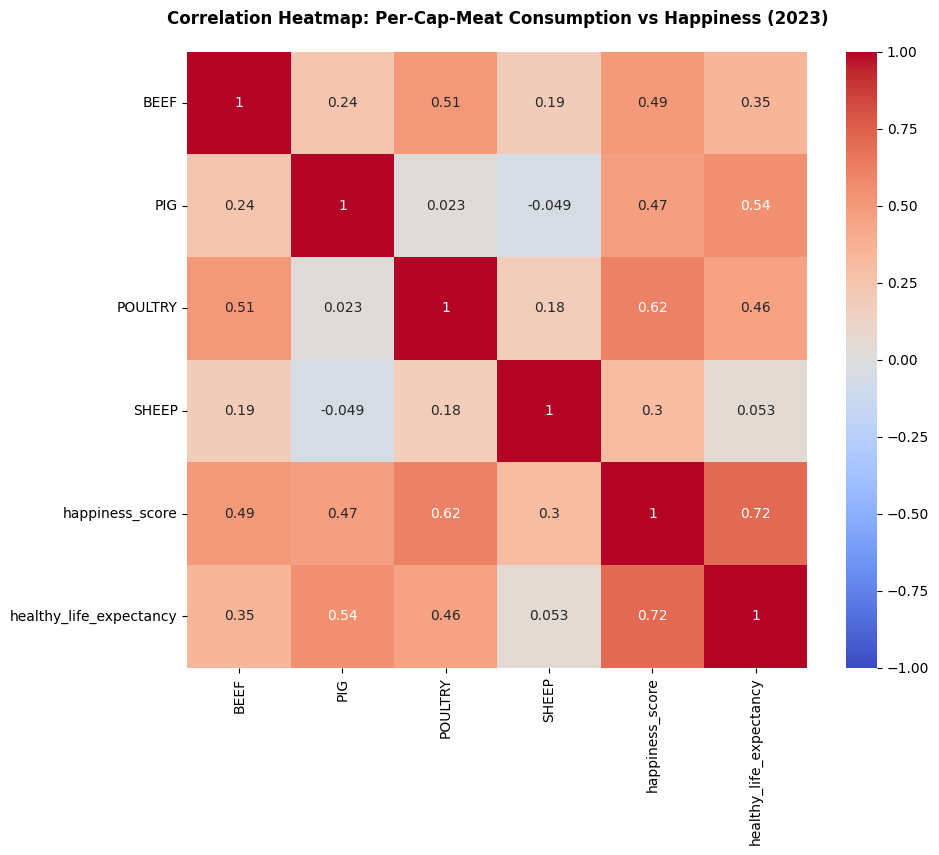

In [107]:
def plot_meat_happiness_correlation_heatmap():
    # Pivot the MEAT_TOTAL dataframe to get meat types as columns
    meat_total = MEAT_TOTAL_CAP.copy()
    meat_total["location"] = meat_total["location"].map(
        iso_to_country
    )
    meat_pivot = meat_total.pivot_table(
        index="location",
        columns="subject",
        values="value",
        aggfunc="sum",
    ).reset_index()
    print(meat_pivot.head())
    meat_pivot.columns.name = (
        None  # Remove the pivot table column name
    )

    # Merge the meat data with happiness data
    merged_data = pd.merge(
        meat_pivot,
        HAPPINESS[2023],
        how="inner",
        left_on="location",
        right_on="country",
    )
    print(merged_data.head())

    # Calculate the correlation matrix
    correlation_matrix = merged_data[
        [
            "BEEF",
            "PIG",
            "POULTRY",
            "SHEEP",
            "happiness_score",
            "healthy_life_expectancy",
        ]
    ].corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
    )
    plt.title(
        "Correlation Heatmap: Per-Cap-Meat Consumption vs Happiness (2023)",
        fontweight="bold", pad=20
    )
    plt.show()


plot_meat_happiness_correlation_heatmap()

## Pairplot: Happiness and meat consumption

In [58]:
MEAT_TOTAL_BY_CNTRY.head()

,location,value,country
0,ARG,5395.543161,Argentina
1,AUS,3000.825953,Australia
2,BRA,21259.630128,Brazil
3,CAN,3250.714115,Canada
4,CHE,576.188936,Switzerland


In [59]:
MEAT_TOTAL.head()

,location,subject,measure,time,value,country
144,KOR,SHEEP,THND_TONNE,2023,18.749100,South Korea
145,ZAF,SHEEP,THND_TONNE,2023,180.244023,South Africa
146,KOR,PIG,THND_TONNE,2023,2074.887458,South Korea
147,IND,SHEEP,THND_TONNE,2023,750.454308,India
149,ETH,SHEEP,THND_TONNE,2023,49.299337,Ethiopia


In [60]:
HAPPINESS[2023].head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [91]:
MEAT_TOTAL.head()

,location,subject,measure,time,value,country
144,KOR,SHEEP,THND_TONNE,2023,18.749100,South Korea
145,ZAF,SHEEP,THND_TONNE,2023,180.244023,South Africa
146,KOR,PIG,THND_TONNE,2023,2074.887458,South Korea
147,IND,SHEEP,THND_TONNE,2023,750.454308,India
149,ETH,SHEEP,THND_TONNE,2023,49.299337,Ethiopia


   beef_value  pig_value  poultry_value  sheep_value      country
0   38.978664  11.778422      38.403747     0.967173    Argentina
1   18.487402  22.607280      44.511370     7.200391    Australia
2   24.573200  12.801988      39.963079     0.545046       Brazil
3   16.921263  15.690051      34.314318     0.922041       Canada
4   13.078711  22.343485      14.538213     1.130748  Switzerland
   beef_value  pig_value  poultry_value  sheep_value      country  \
0   38.978664  11.778422      38.403747     0.967173    Argentina   
1   18.487402  22.607280      44.511370     7.200391    Australia   
2   24.573200  12.801988      39.963079     0.545046       Brazil   
3   16.921263  15.690051      34.314318     0.922041       Canada   
4   13.078711  22.343485      14.538213     1.130748  Switzerland   

                        region  happiness_score  gdp_per_capita  \
0  Latin America and Caribbean            6.024           1.590   
1        North America and ANZ            7.095        

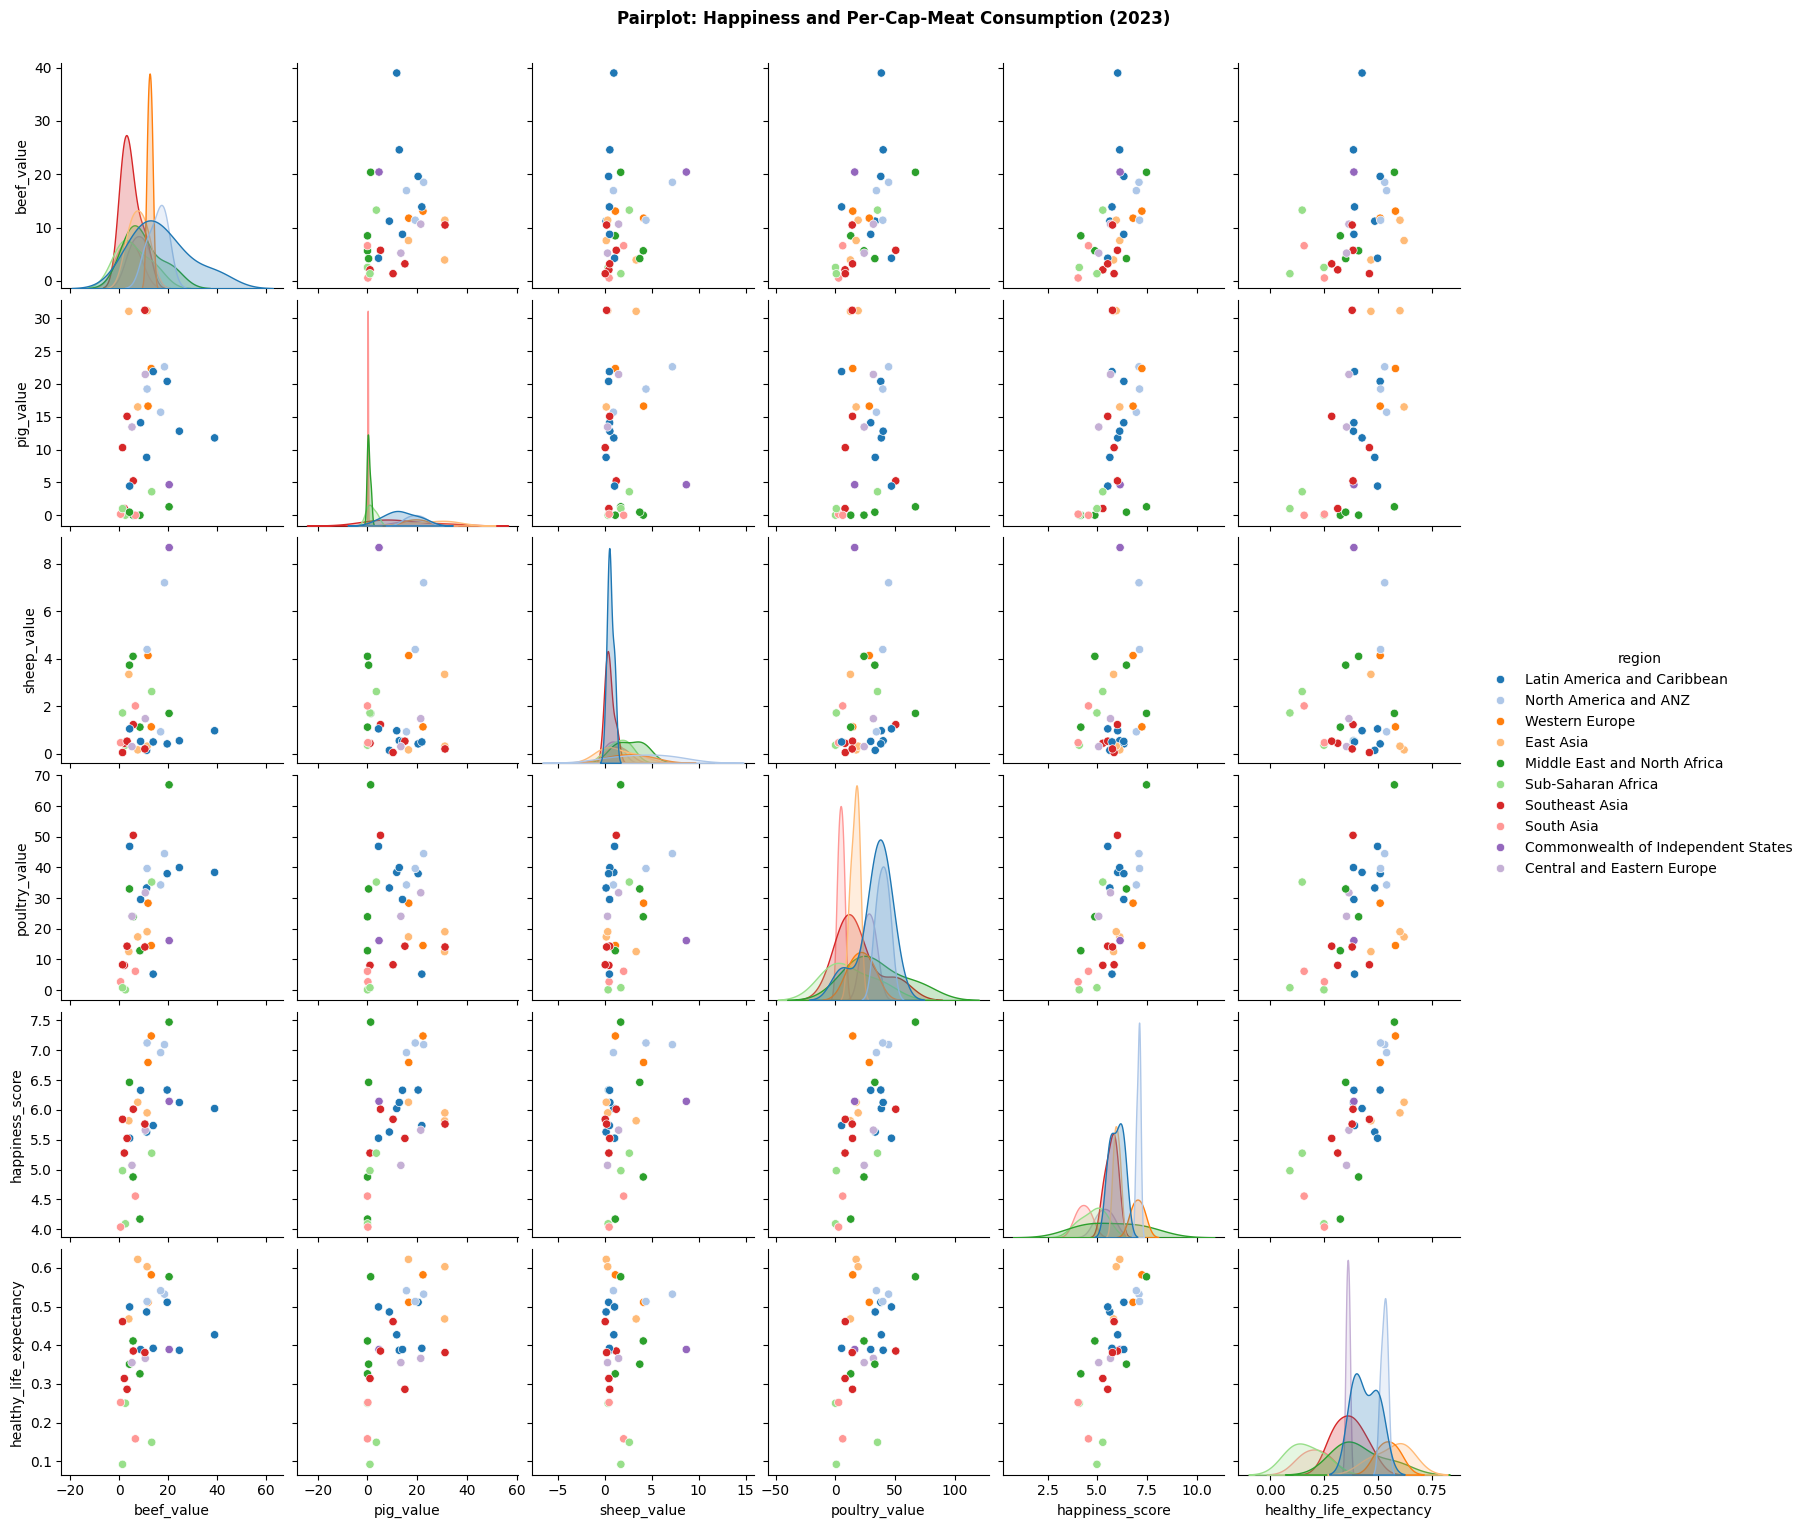

In [102]:
import seaborn as sns


def plot_pairplot_happiness_meat():
    # Create a new dataframe with the required columns
    meat_df = MEAT_TOTAL_CAP.pivot_table(
        index="location",
        columns="subject",
        values="value",
        aggfunc="sum",
    ).reset_index()
    meat_df.columns = [
        "location",
        "beef_value",
        "pig_value",
        "poultry_value",
        "sheep_value",
    ]
    meat_df["country"] = meat_df["location"].map(iso_to_country)
    meat_df = meat_df.drop(columns=["location"])

    print(meat_df.head())

    merged_data = pd.merge(
        meat_df,
        HAPPINESS[2023],
        how="inner",
        left_on="country",
        right_on="country",
    )
    print(merged_data.head())

    # Select relevant columns for the pairplot
    pairplot_data = merged_data[
        [
            "beef_value",
            "pig_value",
            "sheep_value",
            "poultry_value",
            "happiness_score",
            "healthy_life_expectancy",
            "region",
        ]
    ]

    # Plot the pairplot
    sns.pairplot(pairplot_data, hue="region")
    plt.suptitle(
        "Pairplot: Happiness and Per-Cap-Meat Consumption (2023)",
        y=1.02,
        fontweight="bold",
    )
    plt.show()


plot_pairplot_happiness_meat()

In [62]:
MEAT_TOTAL_BY_CNTRY.head()

,location,value,country
0,ARG,5395.543161,Argentina
1,AUS,3000.825953,Australia
2,BRA,21259.630128,Brazil
3,CAN,3250.714115,Canada
4,CHE,576.188936,Switzerland


   meat_consumption (1000 tonnes)      country
0                     5395.543161    Argentina
1                     3000.825953    Australia
2                    21259.630128       Brazil
3                     3250.714115       Canada
4                      576.188936  Switzerland
   meat_consumption (1000 tonnes)      country                       region  \
0                     5395.543161    Argentina  Latin America and Caribbean   
1                     3000.825953    Australia        North America and ANZ   
2                    21259.630128       Brazil  Latin America and Caribbean   
3                     3250.714115       Canada        North America and ANZ   
4                      576.188936  Switzerland               Western Europe   

   happiness_score  gdp_per_capita  social_support  healthy_life_expectancy  \
0            6.024           1.590           1.388                    0.427   
1            7.095           1.899           1.497                    0.532   
2     

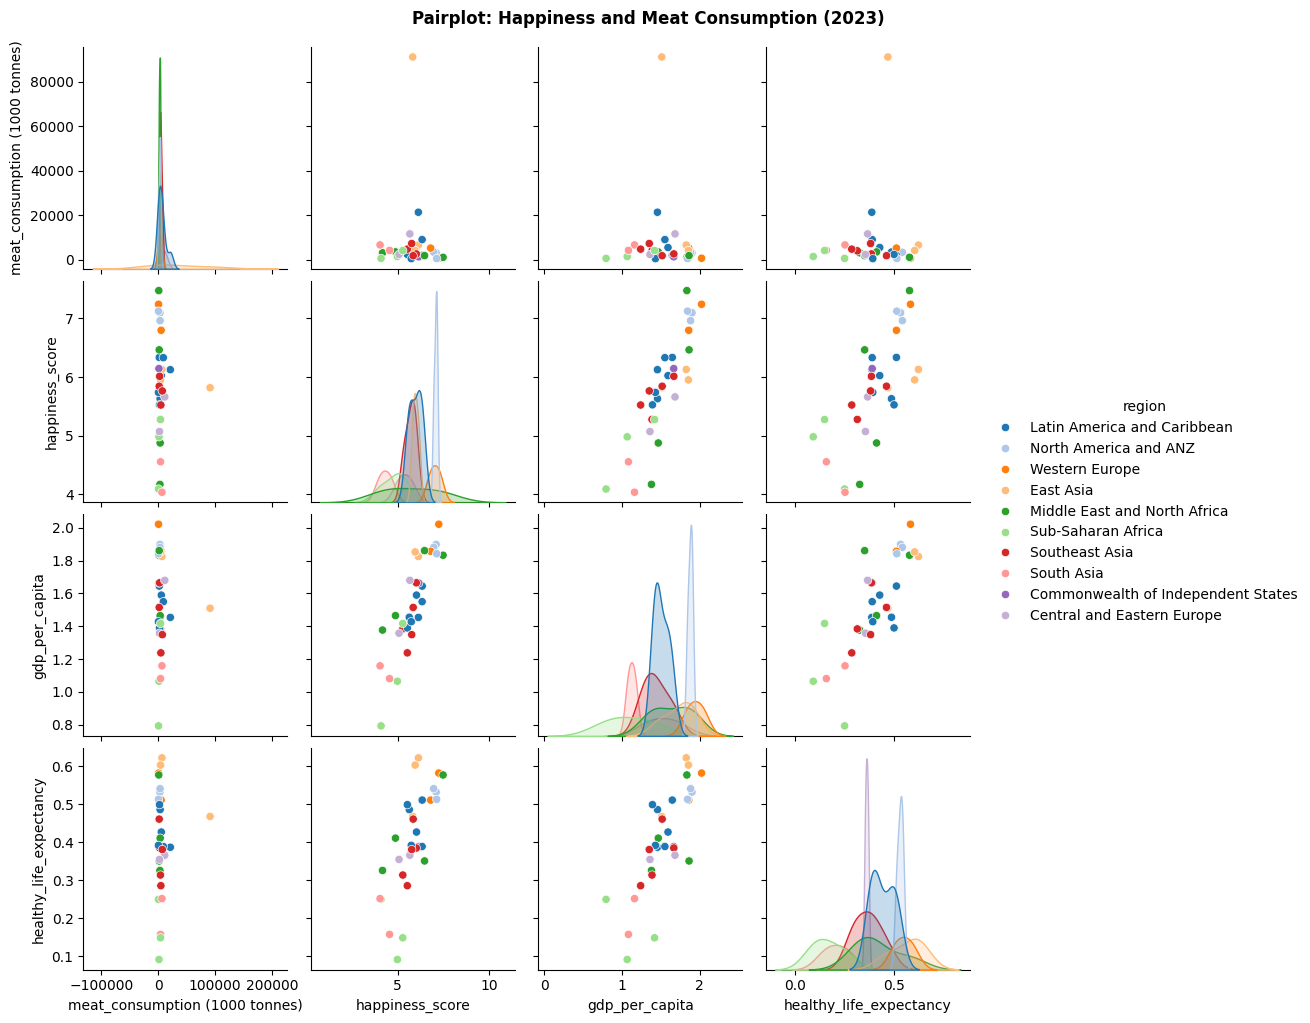

In [63]:
import seaborn as sns


def plot_pairplot_happiness_meat():
    # Create a new dataframe with the required columns
    meat_df = MEAT_TOTAL_BY_CNTRY.copy()
    meat_df["country"] = meat_df["location"].map(iso_to_country)
    meat_df = meat_df.drop(columns=["location"])

    meat_col = "meat_consumption (1000 tonnes)"
    meat_df.rename(columns={"value": meat_col}, inplace=True)

    print(meat_df.head())

    merged_data = pd.merge(
        meat_df,
        HAPPINESS[2023],
        how="inner",
        left_on="country",
        right_on="country",
    )
    print(merged_data.head())

    # Select relevant columns for the pairplot
    pairplot_data = merged_data[
        [
            meat_col,
            "happiness_score",
            "gdp_per_capita",
            "healthy_life_expectancy",
            "region",
        ]
    ]

    # Plot the pairplot
    sns.pairplot(pairplot_data, hue="region")
    plt.suptitle(
        "Pairplot: Happiness and Meat Consumption (2023)",
        y=1.02,
        fontweight="bold",
    )
    plt.show()


plot_pairplot_happiness_meat()

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x12dfef7a0>


subject   location         BEEF          PIG      POULTRY       SHEEP
0        Argentina  2600.824618   705.301260  2038.083433   51.333850
1        Australia   694.246492   761.885261  1329.609614  215.084586
2           Brazil  7650.592259  3576.960904  9897.093091  134.983874
3           Canada   932.044964   775.589425  1502.680821   40.398905
4            Chile   527.853851   492.873614   813.956729    8.870634
    location         BEEF          PIG      POULTRY       SHEEP    country  \
0  Argentina  2600.824618   705.301260  2038.083433   51.333850  Argentina   
1  Australia   694.246492   761.885261  1329.609614  215.084586  Australia   
2     Brazil  7650.592259  3576.960904  9897.093091  134.983874     Brazil   
3     Canada   932.044964   775.589425  1502.680821   40.398905     Canada   
4      Chile   527.853851   492.873614   813.956729    8.870634      Chile   

                        region  happiness_score  gdp_per_capita  \
0  Latin America and Caribbean            6.

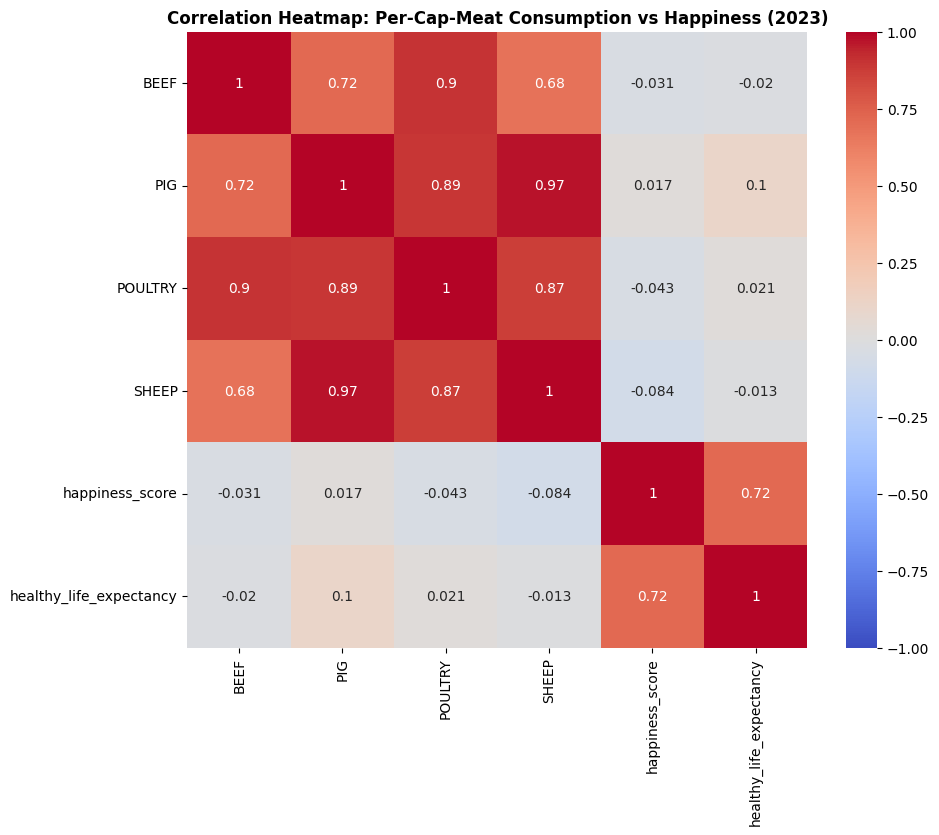

In [104]:
def plot_meat_happiness_correlation_heatmap():
    # Pivot the MEAT_TOTAL dataframe to get meat types as columns
    meat_total = MEAT_TOTAL.copy()
    meat_total["location"] = meat_total["location"].map(
        iso_to_country
    )
    meat_pivot = meat_total.pivot_table(
        index="location",
        columns="subject",
        values="value",
        aggfunc="sum",
    ).reset_index()
    print(meat_pivot.head())
    meat_pivot.columns.name = (
        None  # Remove the pivot table column name
    )

    # Merge the meat data with happiness data
    merged_data = pd.merge(
        meat_pivot,
        HAPPINESS[2023],
        how="inner",
        left_on="location",
        right_on="country",
    )
    print(merged_data.head())

    # Calculate the correlation matrix
    correlation_matrix = merged_data[
        [
            "BEEF",
            "PIG",
            "POULTRY",
            "SHEEP",
            "happiness_score",
            "healthy_life_expectancy",
        ]
    ].corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
    )
    plt.title(
        "Correlation Heatmap: Per-Cap-Meat Consumption vs Happiness (2023)",
        fontweight="bold",
    )
    plt.show()


plot_meat_happiness_correlation_heatmap()